In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

#  Data Wrangling with Python: Activity 7, page 207

In [2]:
#Step 1 - Open the page in a separate Chrome/Firefox tab and use something like an Inspect Element tool to view the source HTML and understand its structure
#view-source:https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) is what I got. Very top of the document says <!DOCTYPE html>
#Step 2 - Read the page using bs4 (Beautiful Soup)
data = open("List of countries by GDP (nominal) - Wikipedia.htm", "r", encoding = 'utf-8') #Saw on Slack someone was using the utf-8 and that's what I needed to make this work correctly
soup = BeautifulSoup(data)
soup

<!DOCTYPE html>
<!-- saved from url=(0064)https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal) --><html class="client-js gr__en_wikipedia_org ve-not-available" dir="ltr" lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>List of countries by GDP (nominal) - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_GDP_(nominal)","wgTitle":"List of countries by GDP (nominal)","wgCurRevisionId":861281423,"wgRevisionId":861281423,"wgArticleId":380845,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages using Timeline","Wikipedia indefinitely semi-protected pages","Use dmy dates from July

In [3]:
#Step 3 - Find the table structure you will need to deal with (how many tables there are?)
find_tables = soup.find_all("table") #Searching for specific item in this case tables. Saw this on page 200
print(len(find_tables)) #len gives count, which in this case is tables

9


In [4]:
#Step 4 - Find the right table using bs4
find_table = soup.find("table", {"class": '"wikitable"|}'}) #Used solution code for this as I wasn't sure how to find table. This uses class to find the table from the wiki
print(type(find_table))

<class 'bs4.element.Tag'>


In [5]:
#Step 5 - Separate the source names and their corresponding data
#This one I ended up using solution code as I couldn't find the page where this was talked about. Pg 202-203 talk about finding children, but didn't see this specifically
sources = find_table.tbody.findAll('tr', recursive=False)[0] #Using find_table from step above. Tr specifies a row in html table
sources_list = [td for td in sources.findAll('td')] #Finding all td or standard cells (https://www.w3schools.com/tags/tag_td.asp)
print(len(sources_list)) #Gives count 

3


In [6]:
#Using find all function again to find the data from data table body (tbody)
data1 = find_table.tbody.findAll('tr', recursive=False)[1].findAll('td', recursive=False) #tr row in html table and td is standard cell
data_tables = []
for td in data1:
    data_tables.append(td.findAll('table')) #Looping through and adding to table
len(data_tables)
#Had to google some of the html terms to really understand what was happening here. That definitely helped me figure it out.

3

In [7]:
#Step 6 - Get the source names from the list of sources you have created
source_names = [source.findAll('a')[0].getText() for source in sources_list] #Used findall function again to find the source names
print(source_names)

['International Monetary Fund', 'World Bank', 'United Nations']


In [8]:
#Step 7 - Separate the header and data from the data that you separated before for the first source only, and then create a DataFame using that
header1 = [th.getText().strip() for th in data_tables[0][0].findAll('thead')[0].findAll('th')] #Calling it header 1 since it's for the first source. Pg 205 showed how to do, but saw the solution code specified it to just first source
header1

['Rank', 'Country', 'GDP(US$MM)']

In [9]:
#Need the data from source 1. Here we find the body and specify data that only applies to source 1 
rows1 = data_tables[0][0].findAll('tbody')[0].findAll('tr')[1:] 
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1] 
df1 = pd.DataFrame(data_rows1, columns=header1) #Creates dataframe combining the data and header for source 1
df1.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,600"
1,2,China[n 1],"12,014,610"
2,3,Japan,"4,872,135"
3,4,Germany,"3,684,816"
4,5,United Kingdom,"2,624,529"


In [10]:
#Step 8 - Repeat the last task for the other two data sources
#Repeating code from above for source 2
header2 = [th.getText().strip() for th in data_tables[1][0].findAll('thead')[0].findAll('th')]
header2

['Rank', 'Country', 'GDP(US$MM)']

In [11]:
rows2 = data_tables[1][0].findAll('tbody')[0].findAll('tr')[1:]
#Had to look at solution code for this part. Only needed this loop for source 2 
def find_right_text(i, td):
    if i == 0:
        return td.getText().strip()
    elif i == 1:
        return td.getText().strip()
    else:
        index = td.text.find("♠")
        return td.text[index+1:].strip()
data_rows2 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2]
df2 = pd.DataFrame(data_rows2, columns=header2)
df2.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


In [12]:
#Source 3 
header3 = [th.getText().strip() for th in data_tables[2][0].findAll('thead')[0].findAll('th')]
header3

['Rank', 'Country', 'GDP(US$MM)']

In [13]:
rows3 = data_tables[2][0].findAll('tbody')[0].findAll('tr')[1:]
data_rows3 = [[find_right_text(i, td) for i, td in enumerate(tr.findAll('td'))] for tr in rows2] #Looks like the loop may be referenced here as well.
df3 = pd.DataFrame(data_rows3, columns=header3)
df3.head()

,Rank,Country,GDP(US$MM)
0,1,United States,"19,390,604"
1,,European Union[23],"17,277,698"
2,2,China[n 4],"12,237,700"
3,3,Japan,"4,872,137"
4,4,Germany,"3,677,439"


# Data Wrangling with Python: Activity 8, page 233

In [14]:
#Step 1 - Read the visit_data.csv file
df_visit = pd.read_csv("visit_data.csv")
df_visit.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


In [15]:
#Step 2 - Check for duplicates
print("First name? {}".format(any(df_visit.first_name.duplicated())))
print("Last name? {}".format(any(df_visit.last_name.duplicated())))
print("Email? {}".format(any(df_visit.email.duplicated())))

#Output showed that there are duplicates within the first and last name, but not email

First name? True
Last name? True
Email? False


In [16]:
#Step 3 - Check if any essential column contains NaN
for c in df_visit.columns:
    miss = df_visit[c].isnull().sum()
    if miss>0:
        print("{} has {} missing value(s)".format(c,miss))
    else:
        print("{} has no missing values".format(c))
        
#Not sure what they're considering essential columns so did it this way. Messed up the first time and accidentally put () instead of {} in the if missing part. Fixed it and it worked nicely.

id has no missing values
first_name has 296 missing value(s)
last_name has 296 missing value(s)
email has no missing values
gender has 505 missing value(s)
ip_address has no missing values
visit has 26 missing value(s)


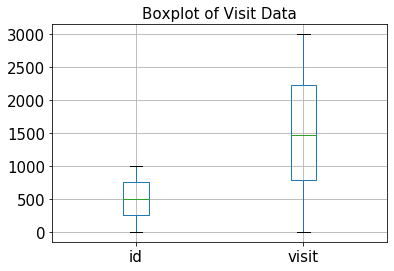

In [17]:
#Step 4 - Get rid of the outliers
#Since I'm a visual person trying a boxplot first to see if I can see outliers
df_visit.plot.box()
plt.title("Boxplot of Visit Data", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
plt.grid(True)
#Got example code from pg 149. No visual outliers that I can see here.

In [47]:
#Decided to also check z-score to see if there are any outliers that I'm missing Pg 230 gave me example
from scipy import stats
cos_arr_z_score = stats.zscore(df_visit.visit)
cos_arr_z_score
#I found no outliers so I can't remove them if they don't exist

array([-0.3255421 , -0.69046701, -1.46324917, -0.59148411,  1.11626906,
       -1.24858746,  0.05011589, -1.14602687, -0.90035846,  0.01076125,
       -0.6976224 , -1.63497854, -0.9981488 ,  0.44008467,  0.49971292,
       -0.1991302 , -0.6737711 , -1.42508709, -1.27005363, -0.8204566 ,
        1.76979472,  0.15267649,  1.17351219, -1.69579936, -0.59029155,
        1.76263933, -0.94209824,  1.261762  ,  1.20332631, -0.479383  ,
        1.74236572, -0.50919712, -1.39646553,  1.00178282, -0.16931608,
       -1.35949601, -1.2438172 , -0.09656961,  0.57961478,  0.87417835,
        0.83124601,  0.80739471,  0.83243858, -1.47875252, -0.85265586,
       -1.04346627, -0.62129824, -1.6910291 , -1.7661607 , -0.03097853,
        0.0226869 ,  1.06618133,  1.64219026,  1.4322988 ,  1.234333  ,
        1.25460661,  1.64219026, -0.02501571,  1.69466312,  0.2683553 ,
       -1.4215094 ,  0.70721924,  1.06260363, -0.95998672,  0.68933077,
       -0.12161348,  1.31781256, -0.16454582,  0.10616645,  0.33

In [19]:
#Step 5 - Report the size difference
len(df_visit)
#There were not outliers so there is no difference in size. However, I'll try the solution code just in case
size_prev = df_visit.shape
df_visit = df_visit[np.isfinite(df_visit['visit'])] #This is an inplace operation. 
size_after = df_visit.shape
print("The size of previous data was - {prev[0]} rows and the size of the new one is - {after[0]} rows".
      format(prev=size_prev, after=size_after))


The size of previous data was - 1000 rows and the size of the new one is - 974 rows


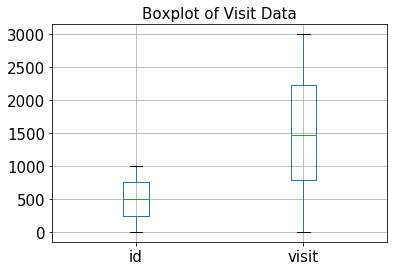

In [20]:
#Step 6 - Create a boxplot to check for outliers. Ha! Didn't realize I was going to have to do this again.
df_visit.plot.box()
plt.title("Boxplot of Visit Data", fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize = 15)
plt.grid(True)

In [21]:
#Step 7 - Get rid of any outliers
#There are no outliers as stated above

#  Insert data into a SQL Lite database – create a table with the following data (Hint: Python for Data Analysis page 191):

## Name, Address, City, State, Zip, Phone Number
##  Add at least 10 rows of data and submit your code with a query generating your results

In [53]:
import sqlite3
#Creating the table called personal
query = """
CREATE TABLE personal
(a VARCHAR(20), b VARCHAR(50), c VARCHAR(20), d VARCHAR(20), e REAL, f REAL); """
con = sqlite3.connect('mydata.sqlite')
con.execute(query)
con.commit()
#Had issues with the table, but it exists so calling that a win

OperationalError: table personal already exists

In [55]:
#Adding 10 rows of data with above requirements
data = [('Rickman, Alan', '812 E Rutherford', 'Kansas City', 'MO', 64117, 8163579512), ('Childs, Julia', '2153 N Oak', 'Kansas City', 'MO', 64117, 8169517589), ('Snow, Albert', '225 N Helm St', 'St Charles', 'MO', 64115, 5739874561), ('Poe, Edgar', '765 Crow St', 'Chicago', 'IL', 58794, 1597539862), ('Outlander, Sam', '22 Glasgow Way', 'Inverness', 'SC', 59835, 4178529630), ('Blanch, Kate', '12 Lord Hwy', 'Columbus', 'OH', 45698, 3214567897), ('Elf, Legolas', '11 One Ring Dr', 'Atom', 'IN', 65498, 7894561230), ('Dragon, Eragon', '43 Flames Ave', 'Birmingham', 'AL', 12345, 8529637410), ('Potter, Harry', '876 Wands Dr', 'New London', 'MA', 23589, 6875421236), ('Granger, Hermione', '458 Library Ave', 'South Wales', 'NY', 32156, 6547891237)]
stmt = "INSERT INTO personal VALUES (?, ?, ?, ?, ?, ?)"
con.executemany(stmt, data)
con.commit()
#Keep gettting database is locked, but ran the code below to see my items and they're there

OperationalError: database is locked

In [57]:
cursor = con.execute('select * from personal')
rows = cursor.fetchall()
rows

[('Bee, Susie', '701 Pine St', 'Kansas City', 'MO', 64117.0, 8164567890.0),
 ('Rickman, Alan',
  '812 E Rutherford',
  'Kansas City',
  'MO',
  64117.0,
  8163579512.0),
 ('Childs, Julia', '2153 N Oak', 'Kansas City', 'MO', 64117.0, 8169517589.0),
 ('Snow, Albert', '225 N Helm St', 'St Charles', 'MO', 64115.0, 5739874561.0),
 ('Poe, Edgar', '765 Crow St', 'Chicago', 'IL', 58794.0, 1597539862.0),
 ('Outlander, Sam',
  '22 Glasgow Way',
  'Inverness',
  'SC',
  59835.0,
  4178529630.0),
 ('Blanch, Kate', '12 Lord Hwy', 'Columbus', 'OH', 45698.0, 3214567897.0),
 ('Elf, Legolas', '11 One Ring Dr', 'Atom', 'IN', 65498.0, 7894561230.0),
 ('Dragon, Eragon',
  '43 Flames Ave',
  'Birmingham',
  'AL',
  12345.0,
  8529637410.0),
 ('Potter, Harry', '876 Wands Dr', 'New London', 'MA', 23589.0, 6875421236.0),
 ('Granger, Hermione',
  '458 Library Ave',
  'South Wales',
  'NY',
  32156.0,
  6547891237.0)]